<a href="https://colab.research.google.com/github/asra020601/genshin/blob/main/genshin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/genshin.csv')

In [ ]:
df.shape

(69, 70)

In [ ]:
df.nunique()

character_name    69
rarity             2
region             5
vision             8
weapon_type        5
                  ..
special_2         10
special_3         10
special_4         10
special_5         10
special_6         10
Length: 70, dtype: int64

In [ ]:
categorical_cols = df.select_dtypes(include="object").columns.tolist()
for col in categorical_cols:
    print(f"{col}", f"Number of unique entries: {len(df[col].unique().tolist())},")
    print(df[col].unique().tolist())

character_name Number of unique entries: 69,
['Albedo', 'Alhaitham', 'Aloy', 'Amber', 'Arataki Itto', 'Baizhu', 'Barbara', 'Beidou', 'Bennett', 'Candace', 'Chongyun', 'Collei', 'Cyno', 'Dehya', 'Diluc', 'Diona', 'Dori', 'Eula', 'Faruzan', 'Fischl', 'Ganyu', 'Gorou', 'Hu Tao', 'Jean', 'Kaedehara Kazuha', 'Kaeya', 'Kamisato Ayaka', 'Kamisato Ayato', 'Kaveh', 'Keqing', 'Kirara', 'Klee', 'Kujou Sara', 'Kuki Shinobu', 'Layla', 'Lisa', 'Mika', 'Mona', 'Nahida', 'Nilou', 'Ningguang', 'Noelle', 'Qiqi', 'Raiden Shogun', 'Razor', 'Rosaria', 'Sangonomiya Kokomi', 'Sayu', 'Shenhe', 'Shikanoin Heizou', 'Sucrose', 'Tartaglia', 'Thoma', 'Tighnari', 'Traveler (Aether)', 'Traveler (Lumine)', 'Venti', 'Wanderer', 'Xiangling', 'Xiao', 'Xingqiu', 'Xinyan', 'Yae Miko', 'Yanfei', 'Yaoyao', 'Yelan', 'Yoimiya', 'Yun Jin', 'Zhongli']
region Number of unique entries: 6,
['Mondstadt', 'Sumeru', nan, 'Inazuma', 'Liyue', 'Snezhnaya']
vision Number of unique entries: 8,
['Geo', 'Dendro', 'Cryo', 'Pyro', 'Hydro', 'E

In [ ]:
df.columns

Index(['character_name', 'rarity', 'region', 'vision', 'weapon_type', 'model',
       'constellation', 'birthday', 'special_dish', 'affiliation', 'voice_eng',
       'voice_cn', 'voice_jp', 'voice_kr', 'release_date', 'ascension',
       'ascension_specialty', 'ascension_talent', 'ascension_boss',
       'talent_book', 'talent_weekly', 'hp_90_90', 'atk_90_90', 'def_90_90',
       'hp_80_90', 'atk_80_90', 'def_80_90', 'hp_80_80', 'atk_80_80',
       'def_80_80', 'hp_70_80', 'atk_70_80', 'def_70_80', 'hp_70_70',
       'atk_70_70', 'def_70_70', 'hp_60_70', 'atk_60_70', 'def_60_70',
       'hp_60_60', 'atk_60_60', 'def_60_60', 'hp_50_60', 'atk_50_60',
       'def_50_60', 'hp_50_50', 'atk_50_50', 'def_50_50', 'hp_40_50',
       'atk_40_50', 'def_40_50', 'hp_40_40', 'atk_40_40', 'def_40_40',
       'hp_20_40', 'atk_20_40', 'def_20_40', 'hp_20_20', 'atk_20_20',
       'def_20_20', 'hp_1_20', 'atk_1_20', 'def_1_20', 'spsecial_0',
       'special_1', 'special_2', 'special_3', 'special_4', 'spe

In [ ]:
df.isnull().sum() #checking for null values

character_name    0
rarity            0
region            3
vision            0
weapon_type       0
                 ..
special_2         0
special_3         0
special_4         0
special_5         0
special_6         0
Length: 70, dtype: int64

<Axes: >

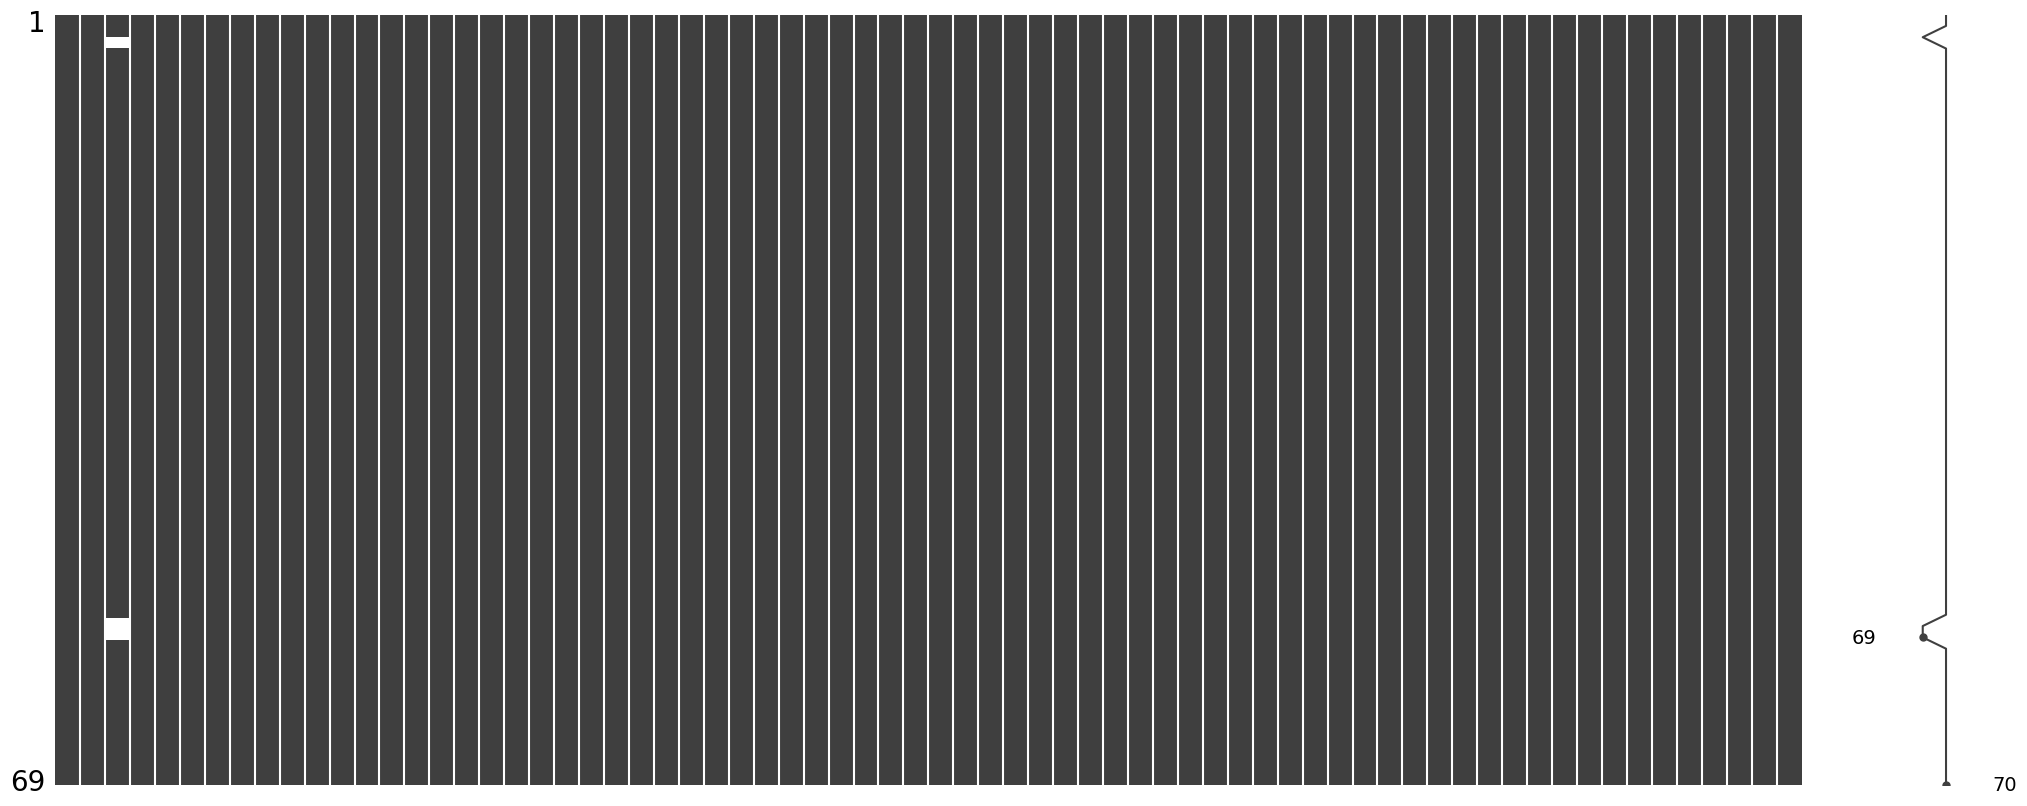

In [ ]:
import missingno as msno
msno.matrix(df)

In [ ]:
from statistics import mean

In [ ]:
avg = df.groupby('character_name')['def_90_90'].mean().reset_index()

In [ ]:
type(avg)

pandas.core.series.Series

In [ ]:
avg['def_90_90']

0     876.0
1     781.0
2     676.0
3     601.0
4     959.0
      ...  
64    750.0
65    548.0
66    615.0
67    734.0
68    738.0
Name: def_90_90, Length: 69, dtype: float64

In [ ]:
avg['character_name'].unique()

array(['Albedo', 'Alhaitham', 'Aloy', 'Amber', 'Arataki Itto', 'Baizhu',
       'Barbara', 'Beidou', 'Bennett', 'Candace', 'Chongyun', 'Collei',
       'Cyno', 'Dehya', 'Diluc', 'Diona', 'Dori', 'Eula', 'Faruzan',
       'Fischl', 'Ganyu', 'Gorou', 'Hu Tao', 'Jean', 'Kaedehara Kazuha',
       'Kaeya', 'Kamisato Ayaka', 'Kamisato Ayato', 'Kaveh', 'Keqing',
       'Kirara', 'Klee', 'Kujou Sara', 'Kuki Shinobu', 'Layla', 'Lisa',
       'Mika', 'Mona', 'Nahida', 'Nilou', 'Ningguang', 'Noelle', 'Qiqi',
       'Raiden Shogun', 'Razor', 'Rosaria', 'Sangonomiya Kokomi', 'Sayu',
       'Shenhe', 'Shikanoin Heizou', 'Sucrose', 'Tartaglia', 'Thoma',
       'Tighnari', 'Traveler (Aether)', 'Traveler (Lumine)', 'Venti',
       'Wanderer', 'Xiangling', 'Xiao', 'Xingqiu', 'Xinyan', 'Yae Miko',
       'Yanfei', 'Yaoyao', 'Yelan', 'Yoimiya', 'Yun Jin', 'Zhongli'],
      dtype=object)

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [ ]:
colors = {'Pyro': 'crimson', 'Hydro':'darkblue', 'Cryo':'cyan','Dendro':'darkgreen', 'Electro': 'darkviolet','Geo':'darkgoldenrod','Anemo':'lightgreen'}

In [ ]:
fig = make_subplots(rows=1, cols=1)
bar_colors = [colors.get(name, 'gray') for name in df['vision']]

# Create the horizontal bar chart
bar_chart = go.Bar(
    x=avg['def_90_90'],
    y=avg['character_name'],
    orientation='h',  # Horizontal bar chart
    marker=dict(color=bar_colors)
)

# Add the bar chart to the subplot
fig.add_trace(bar_chart)

# Update the X-axis to rotate labels by 90 degrees
fig.update_xaxes(tickangle=90)
fig.update_yaxes(categoryorder='total ascending')
# Add labels and title
fig.update_xaxes(title_text='Average DEF 90-90')
fig.update_yaxes(title_text='Character Name')
fig.update_layout(title='Average DEF 90-90 by Character')

# Show the chart
fig.show()




